In [1]:
import mne
import pandas as pd 
import os
import matplotlib.pyplot as plt
import feather 
import numpy as np
import platform

import sys

#sys.path.append('/media/vivi/Data/linux/Code/BBC') 

#os.chdir('d:/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('c:/Users/Engi/all/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('/Users/leupinv/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')


if platform.system()=='Darwin':
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    
    

elif platform.system()=='Windows':
    sys.path.append('../../')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')
elif platform.system()=='Linux':
    os.chdir('/run/user/1000/gvfs/smb-share:server=bigdata,share=arts/Psycho/BBC/BBC/WP1/data/EEG/tsk')
    os.chdir('c:/Users/Engi/all/BBC/WP1/data/EEG/tsk')
from base.files_in_out import getListOfFiles,GetFiles
from stats.stats_helper import filter_list, tTest_ana
import stats.inverse_stats_helper as hp
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage
from base.base_constants import G_N


In [2]:
os.getcwd()

'Z:\\BBC\\WP1\\data\\EEG\\tsk'

In [3]:
fwd=mne.read_forward_solution('coregistration/BBC_5124sol-fwd.fif')

Reading forward solution from Z:\BBC\WP1\data\EEG\tsk\coregistration\BBC_5124sol-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (5124 sources, 128 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [31]:
fwd['src'].plot(trans='coregistration/g01_v2-trans.fif')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
fold_5124_loose_dep3_covend_eLORETA='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/eLORETA'
fold_5124_fixed_dep3_covend_eLORETA='ana/MNE/source/5124_source/fixed/cov_end/depth_3/stc/eLORETA'
fold_5124_loose_dep3_covend_MNE='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/MNE'
fold_5124_loose_dep3_covend_dSPM='ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM'

In [6]:
files = GetFiles(fold_5124_loose_dep3_covend_dSPM,g_num=g_num,eeg_format=eeg_format)
stc_files=files.fflist

In [8]:
stc_files

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskNEG_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g01_n_tsk_maskNEG_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskNEG_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g03_n_tsk_maskNEG_correct_cfa_vep_easy_aware_dia_exh-rh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskNEG_correct_cfa_vep_easy_aware_dia_exh-lh.stc',
 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskNEG\\correct\\cfa\\vep\\easy\\aware\\dia\\exh\\g08_n_tsk_maskNEG_

In [ ]:
# Repeated measure ANOVAs
Cardiac effect:

In [9]:
# read effects
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
anovas_effect='ana/MNE/stats/inverse/anovas/'


In [10]:
files = GetFiles(anovas_effect,g_num=g_num,eeg_format=eeg_format)
anovas_files=files.fflist
anovas_files

['ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\aware-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\aware-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\cardiac_phase-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\cardiac_phase-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\cardXawa_maskOFF-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_FDR_0.01\\cardXawa_maskOFF-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\aware-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\aware-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\cardiac_phase-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\cardiac_phase-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\cardXawa_maskOFF-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskOFF_noc_0.01\\cardXawa_maskOFF-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_F

In [11]:
name='cardXawa_maskON_noc_0.01'
effects=[x for x in anovas_files if name in x ]
effects

['ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\aware-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\aware-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\cardiac_phase-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\cardiac_phase-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\cardXawa_maskON-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01\\cardXawa_maskON-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\aware-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\aware-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\cardiac_phase-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\cardiac_phase-rh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\cardXawa_maskON-lh.stc',
 'ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01_-0.01-0.025\\cardXawa_maskON-r

In [5]:
stc=mne.read_source_estimate('ana/MNE/stats/inverse/anovas/cardXawa_maskON_noc_0.01/aware')

In [6]:
stc.plot('fsaverage')

Using pyvistaqt 3d backend.

Using control points [ 0.          0.         15.53857511]


In [11]:
mne.viz.plot_source_estimates(stc,'fsaverage',verbose='debug')

Using control points [ 0.          0.         15.53857511]
Hemi offset: None
Reading FreeSurfer talairach.xfm file:
Z:\BBC\WP1\data\EEG\tsk\coregistration\MNE-fsaverage-data\fsaverage\mri\transforms\talairach.xfm
Found: 'MNI Transform File'
Color mapping 'curv' with Greys colormap and range [-1.0, 2.0]
Updating LUT with None, None, None, None
Color mapping 'data' with <class 'numpy.ndarray'> colormap and range [0.0, 15.538575113296396]
Updating LUT with None, None, None, 1.0
Color mapping 'data' with <class 'numpy.ndarray'> colormap and range [0.0, 15.538575113296396]
Reading FreeSurfer talairach.xfm file:
Z:\BBC\WP1\data\EEG\tsk\coregistration\MNE-fsaverage-data\fsaverage\mri\transforms\talairach.xfm
Found: 'MNI Transform File'


In [6]:
stc.vertices

[array([   0,    1,    2, ..., 2559, 2560, 2561], dtype=int64),
 array([   0,    1,    2, ..., 2559, 2560, 2561], dtype=int64)]

import os.path as op
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

In [9]:
mne.viz.set_3d_backend('pyvistaqt')

Using pyvistaqt 3d backend.



'notebook'

In [11]:
mne.viz.set_3d_options(depth_peeling=False,antialias=False)

In [7]:
mne.get_config()

{'SUBJECTS_DIR': 'Z:/BBC/WP1/data/EEG/tsk/coregistration/MNE-fsaverage-data'}

In [8]:

sub_dir= 'Z:/BBC/WP1/data/EEG/tsk/coregistration/MNE-fsaverage-data'
mne.utils.set_config("SUBJECTS_DIR", sub_dir, set_env=True)

Attempting to create new mne-python configuration file:
C:\Users\Vivi\.mne\mne-python.json


In [12]:

#os.environ["MNE_COREG_SUBJECTS_DIR"] = 'Z:/BBC/WP1/data/EEG/tsk/coregistration'
stc.plot('fsaverage')

Using control points [ 0.          0.         15.53857511]


In [16]:
stc_lab_lh,stc_lab_rh=hp.plot_label_effect(stc,target_label)

<SourceEstimate | 51 vertices, tmin : 90.0 (ms), tmax : 90.0 (ms), tstep : 3.90625 (ms), data shape : (51, 1), ~924 bytes>

In [56]:
stc.data[stc.data!=0.]

array([7.497867 , 4.8286443, 4.7530437, 4.654754 , 8.363677 , 5.126387 ,
       4.673651 , 4.9375596, 4.4759035, 4.776784 , 7.543216 , 4.6129646,
       4.588445 , 5.6408887, 7.151986 , 4.9343467, 4.8856077, 5.338396 ,
       4.386705 , 5.3658614, 6.050249 , 4.868437 , 6.524465 , 5.5476127,
       6.805833 , 4.861153 , 5.4576254, 5.5328913, 4.868744 , 7.315694 ,
       6.7006817, 4.696965 , 4.80106  , 4.4579616, 6.456237 , 6.866332 ,
       6.6382217, 5.72835  , 4.972858 , 7.393728 , 6.2670345, 6.165422 ,
       4.5377197, 6.288513 , 4.891125 , 5.7509527, 6.5608163, 5.391929 ,
       5.139345 , 5.221511 , 4.207777 , 4.5972223, 4.7197394, 5.1362853,
       5.3298755, 7.76722  , 4.2068486, 5.2028413, 4.717236 , 5.0722528,
       4.2650595, 6.076543 , 4.8832326, 5.2610683, 4.872768 , 4.6417027,
       4.7904377, 4.4231787, 4.747195 , 5.4238844, 5.85305  , 5.746551 ,
       4.541321 , 5.1731515, 4.9326015, 5.92232  , 4.6246133, 4.5387216,
       5.656331 , 7.3808827, 4.650335 , 6.8476405, 

In [63]:
np.where(stc.data!=0.)

(array([  29,   30,   31,   50,  107,  127,  128,  130,  132,  253,  254,
         278,  281,  284,  287,  289,  291,  296,  298,  338,  408,  454,
         486,  488,  498,  542,  543,  545,  546,  554,  556,  557,  564,
         732,  733,  734,  764,  765,  766,  767,  768,  769,  770,  771,
         777,  778,  818,  819,  820,  920,  921,  934,  994, 1062, 1063,
        1064, 1065, 1066, 1069, 1094, 1095, 1096, 1120, 1195, 1196, 1197,
        1198, 1199, 1203, 1204, 1205, 1206, 1207, 1216, 1220, 1221, 1225,
        1226, 1227, 1228, 1229, 1249, 1255, 1533, 1576, 1583, 1608, 1609,
        1610, 1655, 1660, 1664, 1665, 1669, 1671, 1672, 1689, 1690, 1823,
        1910, 1911, 1912, 1913, 1914, 2015, 2017, 2103, 2109, 2110, 2112,
        2113, 2140, 2141, 2142, 2143, 2144, 2267, 2268, 2269, 2270, 2271,
        2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2295, 2299, 2300,
        2305, 2306, 2307, 2308, 2331, 2332, 2577, 2595, 2602, 2649, 2650,
        2654, 2659, 2674, 2682, 2700, 

In [54]:
stc_lab_rh.vertices

[array([], dtype=int64),
 array([ 314,  315,  316,  795,  796, 1307, 1308, 1719, 1720, 1721, 1722,
        2404])]

In [59]:
target_label[1].get_vertices_used(np.arange(2562))

array([ 314,  315,  316,  795,  796, 1307, 1308, 1719, 1720, 1721, 1722,
       2404])

In [60]:
lab=mne.stc_to_label(stc,src=fwd['src'])

-- number of adjacent vertices : 5124


In [62]:
lab[0].get_vertices_used(np.arange(2562))

array([  29,   30,   31,   50,  107,  127,  128,  130,  132,  253,  254,
        278,  281,  284,  287,  289,  291,  296,  298,  338,  408,  454,
        486,  488,  498,  542,  543,  545,  546,  554,  556,  557,  564,
        732,  733,  734,  764,  765,  766,  767,  768,  769,  770,  771,
        777,  778,  818,  819,  820,  920,  921,  934,  994, 1062, 1063,
       1064, 1065, 1066, 1069, 1094, 1095, 1096, 1120, 1195, 1196, 1197,
       1198, 1199, 1203, 1204, 1205, 1206, 1207, 1216, 1220, 1221, 1225,
       1226, 1227, 1228, 1229, 1249, 1255, 1533, 1576, 1583, 1608, 1609,
       1610, 1655, 1660, 1664, 1665, 1669, 1671, 1672, 1689, 1690, 1823,
       1910, 1911, 1912, 1913, 1914, 2015, 2017, 2103, 2109, 2110, 2112,
       2113, 2140, 2141, 2142, 2143, 2144, 2267, 2268, 2269, 2270, 2271,
       2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2295, 2299, 2300,
       2305, 2306, 2307, 2308, 2331, 2332])

# compute anovas

In [85]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_sys')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_sys')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_dia')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_dia')
conditionAXB=[condA1,condA2,condB1,condB2]


['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
[

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
[

In [82]:
crop_VAN=(0.3,0.32)

In [88]:
effects=['cardiac_phase', 'aware', 'cardXawa_maskON']
stsc_obj,pval=hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=crop_VAN,factor_levels=[2,2],FDR=False,p_val=0.01,time_smooth=True)

(30, 5124, 6)
(30, 5124, 6)
(30, 5124, 6)
(30, 5124, 6)
(4, 30, 5124, 6)
5124
6
(30, 4, 5124, 6)
(30, 4, 5124)
(30, 4, 5124)
Using control points [ 0.          0.         11.50014069]
Writing STC to disk...
[done]
Using control points [ 0.          0.         11.49962539]
Writing STC to disk...
[done]
Using control points [ 0.          0.         10.71169337]
Writing STC to disk...
[done]


In [14]:
test_label=mne.read_labels_from_annot('fsaverage',parc='HCPMMP1_combined')

Reading labels from parcellation...
   read 23 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1_combined.annot
   read 23 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/rh.HCPMMP1_combined.annot


In [15]:
names=['Temporo-Parieto-Occipital Junction']
#names=['Inferior Parietal Cortex']
target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

[<Label | fsaverage, 'Temporo-Parieto-Occipital Junction-lh', lh : 3406 vertices>,
 <Label | fsaverage, 'Temporo-Parieto-Occipital Junction-rh', rh : 4769 vertices>]

In [244]:
target_lab_sig= hp.get_sig_label_points(stc,target_label[1],fwd['src'],smooth=False)
target_lab_sig

-- number of adjacent vertices : 5124


<Label | unknown, 'Inferior Parietal Cortex_sig_rh', rh : 5 vertices>

In [253]:
target_lab_sig.vertices

array([ 312,  313,  793, 1715, 1716])

In [257]:
target_lab_sig= [hp.get_sig_label_points(stc,lab,fwd['src'],smooth=False) for lab in target_label]
target_lab_sig

-- number of adjacent vertices : 5124


IndexError: list index out of range

In [245]:
target_lab_sig[0].name

TypeError: 'Label' object is not subscriptable

In [258]:
hp.visualize_label(target_lab_sig,stc)

Using control points [0. 0. 1.]


In [243]:
stc.plot('fsaverage',hemi='both')

Using control points [0.         0.         8.64265888]


In [164]:
target_lab_sig[0].name

'Temporo-Parieto-Occipital Junction_lh'

In [250]:
target_lab_sig

<Label | unknown, 'Inferior Parietal Cortex_sig_rh', rh : 5 vertices>

In [ ]:
vx_lh=target_lab_sig[0].vertices

In [251]:

vx_rh=(target_lab_sig.vertices)+2562
vx_rh

array([2874, 2875, 3355, 4277, 4278])

In [256]:
pval[2][vx_rh]

array([0.01719609, 0.03006016, 0.03445051, 0.01694688, 0.01974061])

In [221]:
mne.stats.fdr_correction(pval[2][vx_lh])

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([0.03147159, 0.0356386 , 0.0356386 , 0.0356386 , 0.03147159,
        0.0356386 , 0.0356386 , 0.03147159, 0.03147159, 0.03147159,
        0.03147159, 0.03147159, 0.03676995, 0.03147159, 0.04106982,
        0.0356386 , 0.03147159, 0.03147159, 0.0356386 , 0.03147159,
        0.0356386 , 0.0356386 , 0.03147159, 0.03147159, 0.0356386 ,
        0.0356386 , 0.03147159, 0.0356386 , 0.03147159, 0.03147159,
        0.03147159, 0.03147159, 0.0356386 , 0.0356386 , 0.03147159,
        0.03147159]))

### notes Card X AWA
- not so strong main effect of cardiac
    - might be interesting: precuneus_4 (early activation) together with parsopercularis_2
- interaction: 
    - left visual areas in pre stimulus: lateraloccipital_2
    - together with rostralmiddlefrontal_11
    - frontalpole_1 activation just before P1 (around 80 ms)
    - insula strong interaction around 540 ms 

## Rsp effect

In [54]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_inh')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_inh')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_aware_exh')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_unaware_exh')
conditionAXB=[condA1,condA2,condB1,condB2]
effects=['rsp_phase', 'aware', 'rspXawa_maskON']

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g49_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g49_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g45_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g45_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g46_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g46_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g40_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g40_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g41_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g41_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g37_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g37_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g38_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g38_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g39_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g39_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_

In [199]:

stc,pvals=hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=(-0.15,0.6),factor_levels=[2,2],FDR=False,p_val=0.01)

(30, 5124, 7)
(30, 5124, 7)
(30, 5124, 7)
(30, 5124, 7)
(4, 30, 5124, 7)
5124
7
(30, 4, 5124, 7)
(30, 4, 35868)
Using control points [ 0.          0.         13.12987603]
Writing STC to disk...
[done]
Using control points [ 0.          0.         11.30922217]
Writing STC to disk...
[done]
Using control points [ 0.          0.         14.42248772]
Writing STC to disk...
[done]


### notes RSP X awa
- Strong main effect of rsp in visual areas (always more activity in inhlation)
    - plus sensorimotor areas: postcentral_13, precentral_15
- interaction effect --> 
    - insula activity around 270 ms after so
    - strong activation in precentral_4 and precentral_6

# Rsp X Card

In [56]:

condA1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_sys_inh')
condA2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_dia_inh')
condB1=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_sys_exh')
condB2=hp.get_list_cond(stc_files,'maskON_correct_cfa_vep_norm_dia_exh')
conditionAXB=[condA1,condA2,condB1,condB2]
effects=['rsp_phase', 'cardiac', 'rspXcard']

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_sys_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g47_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g47_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g49_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g49_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_dia_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/inh/g

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g45_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g45_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g46_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g46_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g47_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g47_n_tsk_maskON_correct_cfa_vep_norm_sys_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/sys/exh/g

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g44_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g44_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g45_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g45_n_tsk_maskON_correct_cfa_vep_norm_dia_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/dia/exh/g

In [59]:

hp.Anovas_ana(conditionAXB,effects_labels=effects,crop_value=(-0.15,0.6),factor_levels=[2,2],FDR=False,p_val=0.01)

(30, 5124, 193)
(30, 5124, 193)
(30, 5124, 193)
(30, 5124, 193)
(4, 30, 5124, 193)
5124
193
(30, 4, 5124, 193)
(30, 4, 988932)
Using control points [ 7.74642278  8.98317287 18.47784866]
Writing STC to disk...
[done]
Using control points [ 0.          0.         15.37888284]
Writing STC to disk...
[done]
Using control points [ 0.          8.76759065 22.61674034]
Writing STC to disk...
[done]


[<SourceEstimate | 5124 vertices, tmin : -150.0 (ms), tmax : 600.0 (ms), tstep : 3.90625 (ms), data shape : (5124, 193), ~7.6 MB>,
 <SourceEstimate | 5124 vertices, tmin : -150.0 (ms), tmax : 600.0 (ms), tstep : 3.90625 (ms), data shape : (5124, 193), ~7.6 MB>,
 <SourceEstimate | 5124 vertices, tmin : -150.0 (ms), tmax : 600.0 (ms), tstep : 3.90625 (ms), data shape : (5124, 193), ~7.6 MB>]

# Label time course

In [33]:
test_label=mne.read_labels_from_annot('fsaverage',parc='aparc_sub')

Reading labels from parcellation...
   read 226 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/rh.aparc_sub.annot


In [34]:
names=['insula_1']

target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

[<Label | fsaverage, 'insula_1-lh', lh : 950 vertices>,
 <Label | fsaverage, 'insula_1-rh', rh : 679 vertices>]

In [64]:
test_label=mne.read_labels_from_annot('fsaverage',parc='HCPMMP1_combined')

Reading labels from parcellation...
   read 23 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1_combined.annot
   read 23 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/rh.HCPMMP1_combined.annot


In [66]:
names=['Temporo-Parieto-Occipital Junction']
target_label=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label

[<Label | fsaverage, 'Temporo-Parieto-Occipital Junction-lh', lh : 3406 vertices>,
 <Label | fsaverage, 'Temporo-Parieto-Occipital Junction-rh', rh : 4769 vertices>]

In [61]:
target_label.append(target_label)

In [196]:
names=['L_TPOJ1_ROI']

target_label_b=[x for x in test_label for name in names if (name+'-lh'==x.name) or (name+'-rh'==x.name) ]

target_label_b

[<Label | fsaverage, 'L_TPOJ1_ROI-lh', lh : 856 vertices>]

In [197]:
target_label.append(target_label_b[0])

In [198]:
target_label

[<Label | fsaverage, 'L_FOP3_ROI-lh', lh : 516 vertices>,
 <Label | fsaverage, 'L_TPOJ1_ROI-lh', lh : 856 vertices>]

## Anovas on label time course
ROI -->  several insula 

### notes Card X AWA
- not so strong main effect of cardiac
    - might be interesting: precuneus_4 (early activation, sig with FDR bigger in sys than dia around 30 ms after SO) together with parsopercularis_2 (also stronger in the  sys before stim onset, sig only at the 0.01 lvl does not survive correction) 
- interaction: 
    - left visual areas in pre stimulus: lateraloccipital_2 (crossed effect, awa_dia + unawa_sys stronger than unawadia +awa_sys), no effect with FDR but high F values (survives at <.001)
    - together with rostralmiddlefrontal_11 (small values in the label time course)
    - frontalpole_1 activation just before P1 (around 80 ms) (small values in the label time course)
    - insula strong interaction around 540 ms 

In [23]:
search_lab_card=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
stc_list_card = [hp.get_list_cond(stc_files, lab) for lab in search_lab_card]

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
[

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
[

In [ ]:
target_lab_sig[0].name

In [26]:
%matplotlib qt

effect_labels=['card','aware','cardXawa']
data_list=hp.Anovas_label_time_course(stc_list_card,search_lab_card,lab_sig_clu_0,crop_value=(0.09,0.12),effects_labels=effect_labels,FDR=False,p_val=0.05,plot_bar=True)




(30, 5124, 9)
(30, 5124, 9)
(30, 5124, 9)
(30, 5124, 9)
(4, 30, 5124, 9)
5124
9
the rh is True
(4, 30, 9)
(30, 4, 9)
9
9
9


In [27]:
data_lab_ax = np.swapaxes(np.asarray(data_list), 1, 0)
data_lab_ax

array([[ 4.635817  ,  4.18325209,  5.82723474,  4.77439189],
       [ 6.7435776 ,  4.9367577 ,  7.2966292 ,  4.67061997],
       [12.15311504,  9.53345286, 12.75093363,  8.33162947],
       [ 5.77333754,  4.06837919,  5.34180406,  3.79787995],
       [ 7.23188573,  7.77109427,  8.36323549,  8.9113551 ],
       [ 4.84607062,  4.60328956,  5.71524747,  5.14756072],
       [ 4.11666736,  3.70657985,  4.24391403,  4.78778726],
       [ 5.59192994,  6.18064042,  6.28651678,  6.05633983],
       [ 6.35299519,  7.36196115,  6.99949709,  7.04333529],
       [ 9.82965509,  7.54717247, 10.47451449,  8.25551471],
       [ 7.76335566,  6.08286145,  8.30576536,  6.29612711],
       [ 2.83087904,  3.64939202,  3.06962363,  4.32491308],
       [ 5.78865205,  3.75133511,  5.82706681,  3.70644841],
       [ 5.33873669,  8.3216984 ,  5.79371568,  8.47200228],
       [ 3.92929054,  3.3498855 ,  4.45520143,  3.05671129],
       [ 9.65235487,  9.98428679,  9.40108764, 10.71678773],
       [ 3.39667051,  2.

In [28]:

cond_list=['aware_sys','unaware_sys','aware_dia','unaware_dia']
data_list=pd.DataFrame(data_lab_ax,columns=cond_list)
data_list

,aware_sys,unaware_sys,aware_dia,unaware_dia
0,4.635817,4.183252,5.827235,4.774392
1,6.743578,4.936758,7.296629,4.670620
2,12.153115,9.533453,12.750934,8.331629
3,5.773338,4.068379,5.341804,3.797880
4,7.231886,7.771094,8.363235,8.911355
5,4.846071,4.603290,5.715247,5.147561
6,4.116667,3.706580,4.243914,4.787787
7,5.591930,6.180640,6.286517,6.056340
8,6.352995,7.361961,6.999497,7.043335
9,9.829655,7.547172,10.474514,8.255515


In [29]:
dict_awa_list={}
for col in data_list.columns:
    mean_card_awa=data_list[col].mean()
    sem_card_awa=data_list[col].sem()
    
    dict_awa_list[f'{col}']={'mean':mean_card_awa,'sem':sem_card_awa}
dict_awa_list

{'aware_sys': {'mean': 5.8902997714799055, 'sem': 0.4369529642843196},
 'unaware_sys': {'mean': 5.875093043379182, 'sem': 0.4474271113955162},
 'aware_dia': {'mean': 6.230537806110888, 'sem': 0.4511311241289797},
 'unaware_dia': {'mean': 6.001039952735715, 'sem': 0.4554411273494068}}

In [30]:
data_list.columns

Index(['aware_sys', 'unaware_sys', 'aware_dia', 'unaware_dia'], dtype='object')

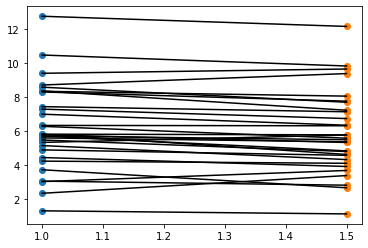

In [31]:
%matplotlib inline
x1=data_list['aware_dia']
x2=data_list['aware_sys']
y1=np.full(len(x1),1)
y2=np.full(len(x1),1.5)
plt.scatter(y1,x1)
plt.scatter(y2,x2)
for i in range (len(x1)):
    plt.plot([y1[i],y2[i]],[x1[i],x2[i]],color='k')


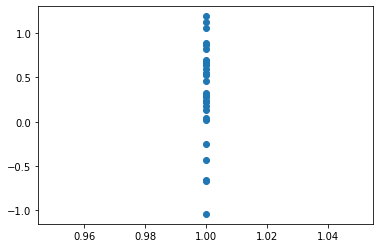

In [32]:

plt.scatter(y1,x1-x2)

In [21]:

color_list=['tab:orange','tab:orange','b','b']
facecolor_list=['w','tab:orange','w','b']
xticklab=['Aware','Unaware']
xlab='Awareness'
cond_list=['aware_sys','aware_dia','unaware_sys','unaware_dia']
    
    
hatch_list=['///','','///','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):
    
    
    ax.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
            edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
            width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    
    x+=1
    


plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
plt.ylabel('current density (A.U.)',size='x-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')



In [91]:
os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
png=f'P1_int_inverse_space_cardXawa.png'
fig_path=f'ana/results_report/images/barplots/{png}'

fig.savefig(fig_path,dpi=150,bbox_inches='tight')

In [22]:
import scipy.stats as stats

In [23]:
stats.ttest_rel(data_list['aware_dia'],data_list['aware_sys'])

Ttest_relResult(statistic=3.448848140240915, pvalue=0.001743318716274855)

In [66]:
stats.ttest_rel(data_list['aware_sys'],data_list['unaware_sys'])

Ttest_relResult(statistic=0.05812148762371486, pvalue=0.9540505067011734)

In [67]:
stats.ttest_rel(data_list['aware_dia'],data_list['unaware_dia'])

Ttest_relResult(statistic=0.8227129249223837, pvalue=0.4173851701617264)

In [26]:
stats.ttest_rel(data_list['aware_sys'],data_list['unaware_sys'])

Ttest_relResult(statistic=0.05812148762371486, pvalue=0.9540505067011734)

In [69]:
stats.ttest_rel(data_list['unaware_dia'],data_list['unaware_sys'])

Ttest_relResult(statistic=1.1654615185783874, pvalue=0.25332903259824535)

In [33]:
import pingouin as pg
pg.ttest(data_list['aware_dia'],data_list['aware_sys'],paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.448848,29,two-sided,0.001743,"[0.14, 0.54]",0.139876,20.321,0.114889


In [34]:
pg.ttest(data_list['unaware_dia'],data_list['unaware_sys'],paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.165462,29,two-sided,0.253329,"[-0.1, 0.35]",0.050935,0.36,0.058384


## Significant label analysis


In [186]:
target_lab_sig= [hp.get_sig_label_points(stc,lab,fwd['src'],smooth=False) for lab in target_label]
target_lab_sig

-- number of adjacent vertices : 5124
-- number of adjacent vertices : 5124


[<Label | unknown, 'Temporo-Parieto-Occipital Junction_sig_lh', lh : 36 vertices>,
 <Label | unknown, 'Temporo-Parieto-Occipital Junction_sig_rh', rh : 27 vertices>]

In [164]:
target_lab_sig[0].name

'Temporo-Parieto-Occipital Junction_lh'

In [188]:
hp.visualize_label(target_lab_sig[0],stc)

Using control points [0. 0. 1.]


In [184]:
stc.plot('fsaverage',hemi='both')

Using control points [4.91858484 5.64026098 8.64265888]


Traceback (most recent call last):
  File "/Applications/anaconda3/envs/mne_24/lib/python3.9/site-packages/mne/viz/_brain/_brain.py", line 58, in safe_event
    return fun(*args, **kwargs)
  File "/Applications/anaconda3/envs/mne_24/lib/python3.9/site-packages/mne/viz/_brain/_brain.py", line 858, in _play
    self._advance()
  File "/Applications/anaconda3/envs/mne_24/lib/python3.9/site-packages/mne/viz/_brain/_brain.py", line 876, in _advance
    self.callbacks["time"](idx, update_widget=True)
TypeError: 'NoneType' object is not callable


## Cluster label analysis 

In [115]:
stc_list_card

[[<SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices, tmin : -101.5625 (ms), tmax : 601.5625 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~3.6 MB>,
  <SourceEstimate | 5124 vertices,

In [116]:
%matplotlib qt

effect_labels=['card','aware','cardXawa']
clu, data_list=hp.Anovas_clus_label_time_course(stc_list_card,search_lab_card,lab_sig_clu,crop_value=[-0.15,0.6],effects_labels=effect_labels,FDR=False,p_val=0.05,effects='A:B',n_perm=10000,thresh=None)





(30, 5124, 181)
(30, 5124, 181)
(30, 5124, 181)
(30, 5124, 181)
(4, 30, 5124, 181)
5124
181
(4, 30, 181)
9.229728023888658
<function Anovas_clus_label_time_course.<locals>.stat_fun_anov at 0x000001AA37A864C0>
(4, 30, 181)
(4, 30, 181)
stat_fun(H1): min=0.000065 max=13.134607
Running initial clustering
Found 3 clusters
Permuting 9999 times...



Computing cluster p-values
Done.


In [113]:
F_obs, clusters, clust_p, H0=clu

In [114]:
clust_p

array([0.0639, 0.0542, 0.0695])

In [151]:
plt.plot(F_obs)

In [126]:
data_N=np.swapaxes(data_list,1,0)
# da 100 a 104 dovrebbe corrispondere a tempo di interess
data_N.shape

(30, 4, 181)

In [170]:
data_list_VAN=np.mean(data_N[:,:,100:108],2)
np.shape(data_list_VAN)

(30, 4)

In [179]:
df=pd.DataFrame(data_list_VAN,columns=['awa_sys','unawa_sys','awa_dia','unawa_dia'])
df

,awa_sys,unawa_sys,awa_dia,unawa_dia
0,3.681491,3.133600,3.620570,3.182885
1,3.266006,2.115635,2.141850,2.309938
2,1.185840,0.777320,1.718550,0.931348
3,1.583689,1.047986,1.089615,1.437626
4,3.526045,3.749272,4.112539,4.070538
5,1.468685,1.110234,1.677046,1.174609
6,2.414400,1.568467,2.185236,2.657592
7,1.060884,1.345582,0.948949,0.844601
8,4.313622,2.869213,2.586635,4.572766
9,4.573520,2.512403,4.471696,3.378241


In [172]:
df['sys_diff']=df['awa_sys']-df['unawa_sys']
df['dia_diff']=df['awa_dia']-df['unawa_dia']

In [173]:
import seaborn as sns
ax=sns.distplot(df['dia_diff'])

ax=sns.distplot(df['sys_diff'],color='r')

In [174]:
df['awa_diff']=df['awa_sys']-df['awa_dia']
df['unawa_diff']=df['unawa_sys']-df['unawa_dia']

In [178]:
import seaborn as sns
ax=sns.distplot(df['awa_diff'])

ax=sns.distplot(df['unawa_diff'],color='r')

In [197]:
#df.reset_index(inplace=True)
df_wide=pd.wide_to_long(df,['awa','unawa'],sep='_',i='index',j='card',suffix=r'\w+')
df_wide.drop('level_0',axis=1,inplace=True)
df_wide=df_wide.stack()
df_wide=df_wide.reset_index()
df_wide

,index,card,level_2,0
0,0,sys,awa,3.681491
1,0,sys,unawa,3.133600
2,1,sys,awa,3.266006
3,1,sys,unawa,2.115635
4,2,sys,awa,1.185840
...,...,...,...,...
115,27,dia,unawa,1.175171
116,28,dia,awa,2.768463
117,28,dia,unawa,3.086927
118,29,dia,awa,1.886092


In [205]:
df_wide.columns

Index(['index', 'card', 'level_2', 0], dtype='object')

In [213]:
sns.boxenplot(data=df_wide,y=0,x='card',hue='level_2')

<AxesSubplot:xlabel='card', ylabel='0'>

In [206]:
import pingouin as pg
pg.rm_anova(data=df_wide,dv=0,within=['card','level_2'],subject='index')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,card,0.014296,1,29,0.014296,0.050232,0.824231,0.824231,0.001729,1.0
1,level_2,1.820935,1,29,1.820935,5.163303,0.030663,0.030663,0.151136,1.0
2,card * level_2,1.828123,1,29,1.828123,9.023870,0.005445,0.005445,0.237321,1.0


In [207]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['card','level_2'],subject='index')

,Contrast,card,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,card,-,dia,sys,True,True,-0.224126,29.0,two-sided,0.824231,0.199,-0.022125
1,level_2,-,awa,unawa,True,True,2.272290,29.0,two-sided,0.030663,1.774,0.247493
2,card * level_2,dia,awa,unawa,True,True,-0.003136,29.0,two-sided,0.997519,0.194,-0.000445
3,card * level_2,sys,awa,unawa,True,True,4.321227,29.0,two-sided,0.000166,164.147,0.483655


In [208]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['level_2','card'],subject='index')

,Contrast,level_2,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,level_2,-,awa,unawa,True,True,2.272290,29.0,two-sided,0.030663,1.774,0.247493
1,card,-,dia,sys,True,True,-0.224126,29.0,two-sided,0.824231,0.199,-0.022125
2,level_2 * card,awa,dia,sys,True,True,-2.174154,29.0,two-sided,0.037997,1.491,-0.247672
3,level_2 * card,unawa,dia,sys,True,True,1.715460,29.0,two-sided,0.096928,0.715,0.219077


In [214]:
data_list_VAN=np.mean(data_N[:,:,40:45],2)
np.shape(data_list_VAN)

(30, 4)

In [225]:
df=pd.DataFrame(data_list_VAN,columns=['awa_sys','unawa_sys','awa_dia','unawa_dia'])
df

,awa_sys,unawa_sys,awa_dia,unawa_dia
0,1.061955,0.727131,1.182168,1.549799
1,1.168939,0.626341,0.795019,0.816112
2,0.906738,1.724882,1.515582,1.149019
3,1.768004,1.282559,2.166566,0.651856
4,1.513550,1.254890,1.403153,1.088191
5,0.574597,1.179906,1.953096,1.756729
6,1.386349,1.013253,1.289837,1.141444
7,2.318528,1.100542,1.141441,0.496003
8,1.695322,1.883947,1.261615,1.345263
9,1.673591,1.665963,2.786054,1.469182


In [216]:
df['sys_diff']=df['awa_sys']-df['unawa_sys']
df['dia_diff']=df['awa_dia']-df['unawa_dia']

In [218]:
import seaborn as sns
ax=sns.distplot(df['dia_diff'])

ax=sns.distplot(df['sys_diff'],color='r')

In [219]:
df['awa_diff']=df['awa_sys']-df['awa_dia']
df['unawa_diff']=df['unawa_sys']-df['unawa_dia']

In [ ]:
import seaborn as sns
ax=sns.distplot(df['awa_diff'])

ax=sns.distplot(df['unawa_diff'],color='r')

In [227]:
df.reset_index(inplace=True)
df_wide=pd.wide_to_long(df,['awa','unawa'],sep='_',i='index',j='card',suffix=r'\w+')
df_wide.drop('level_0',axis=1,inplace=True)
df_wide=df_wide.stack()
df_wide=df_wide.reset_index()
df_wide

,index,card,level_2,0
0,0,sys,awa,1.061955
1,0,sys,unawa,0.727131
2,1,sys,awa,1.168939
3,1,sys,unawa,0.626341
4,2,sys,awa,0.906738
...,...,...,...,...
115,27,dia,unawa,1.242809
116,28,dia,awa,2.200270
117,28,dia,unawa,1.478501
118,29,dia,awa,2.479858


In [205]:
df_wide.columns

Index(['index', 'card', 'level_2', 0], dtype='object')

In [228]:
sns.boxenplot(data=df_wide,y=0,x='card',hue='level_2')

<AxesSubplot:xlabel='card', ylabel='0'>

In [230]:
sns.boxenplot(data=df_wide,y=0,hue='card',x='level_2')

<AxesSubplot:xlabel='level_2', ylabel='0'>

In [235]:
import pingouin as pg
pg.rm_anova(data=df_wide,dv=0,within=['level_2','card'],subject='index')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,level_2,0.019252,1,29,0.019252,0.103686,0.749760,0.749760,0.003563,1.0
1,card,0.155811,1,29,0.155811,0.846386,0.365167,0.365167,0.028358,1.0
2,level_2 * card,1.085749,1,29,1.085749,6.605145,0.015571,0.015571,0.185511,1.0


In [232]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['card','level_2'],subject='index')

,Contrast,card,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,card,-,dia,sys,True,True,-0.919992,29.0,two-sided,0.365167,0.286,-0.150544
1,level_2,-,awa,unawa,True,True,0.322003,29.0,two-sided,0.749760,0.204,0.052871
2,card * level_2,dia,awa,unawa,True,True,2.075683,29.0,two-sided,0.046896,1.259,0.407336
3,card * level_2,sys,awa,unawa,True,True,-1.471997,29.0,two-sided,0.151792,0.513,-0.275646


In [233]:
pg.pairwise_ttests(data=df_wide,dv=0,within=['level_2','card'],subject='index')

,Contrast,level_2,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,level_2,-,awa,unawa,True,True,0.322003,29.0,two-sided,0.749760,0.204,0.052871
1,card,-,dia,sys,True,True,-0.919992,29.0,two-sided,0.365167,0.286,-0.150544
2,level_2 * card,awa,dia,sys,True,True,1.069072,29.0,two-sided,0.293856,0.327,0.203597
3,level_2 * card,unawa,dia,sys,True,True,-2.499589,29.0,two-sided,0.018343,2.707,-0.478030


In [161]:
clust_p

array([0.9983, 0.9739, 0.984 , 0.996 , 0.9983, 0.9983, 0.9999, 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9994,
       0.9609, 0.7537, 0.5893, 0.7188, 0.8947, 0.9739, 0.996 , 0.9983,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9999,
       0.9924, 0.9195, 0.9609, 0.9924, 0.9195, 0.7537, 0.8139, 0.9609,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 0.9983, 0.984 , 0.8692, 0.319 ,
       0.0914, 0.0634, 0.1736, 0.5033, 0.4755, 0.2679, 0.4241, 0.8418,
       0.984 , 0.996 , 0.996 , 0.9994, 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9999, 0.9739,
       0.9195, 0.9739, 0.9994, 1.    , 1.    , 1.    , 0.9999, 0.9999,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9983,
      

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)

In [96]:
H0

array([ 42.27926412,  26.71069911,   0.        ,   0.        ,
         0.        ,  43.22191861, 115.81513305,   0.        ,
         0.        ,  12.4949894 ,  18.82388814,  56.61670855,
        24.81391845, 196.54498598,  15.71659943,   4.4807177 ,
        16.53356676,  61.36434433,   0.        ,  86.68853415,
        63.57051925,   0.        , 201.88512378, 126.44420265,
        23.83912449,  63.19310095,  61.73608275,  13.6843763 ,
         0.        ,   4.58342504,   9.51649542, 108.60853466,
        14.40646485, 191.11003409,  19.55154687,  14.87837589,
         0.        ,  41.77946449,  50.10147079,   0.        ,
         9.36950939,   0.        ,  21.11549303,   0.        ,
        35.30589683,   0.        ,   9.66938372,   4.35320349,
         0.        ,  14.75725079])

(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)
(30, 4, 193)


In [48]:
point=target_label[0].get_vertices_used(np.arange(5124))

In [111]:
point

array([ 137,  139,  299,  300,  301,  571,  574,  575,  780, 1259, 1261,
       1262, 1263, 1264, 1268, 1269, 1300, 1302, 1691, 1692, 1693, 1694,
       1695, 1717, 2350, 2356, 2357, 2358, 2360, 2361, 3179, 3180, 3181,
       3182, 3183, 3184, 3185, 3186, 3188, 3220, 3221, 3222, 3223, 3779,
       3780, 3781, 3782, 3783, 3784, 3785, 3786, 3822, 3823])

In [51]:
plt.plot(point)

## Rsp labels

### notes RSP X awa
- Strong main effect of rsp in visual areas (always more activity in inhlation)
    - plus sensorimotor areas: postcentral_13, precentral_15
- interaction effect --> 
    - insula activity around 270 ms after so
    - strong activation in precentral_4 and precentral_6

(3, 193)

In [109]:
search_lab_rsp=['maskON_correct_cfa_vep_norm_aware_inh','maskON_correct_cfa_vep_norm_unaware_inh','maskON_correct_cfa_vep_norm_aware_exh','maskON_correct_cfa_vep_norm_unaware_exh']
stc_list_rsp = [hp.get_list_cond(stc_files, lab) for lab in search_lab_rsp]

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g51_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/inh/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g01_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskO

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g45_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g45_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g46_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g46_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g47_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/inh/g47_n_tsk_maskON_correct_cfa_vep_norm_unaware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g41_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g41_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g42_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g44_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/exh/g44_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g38_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g38_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g39_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g39_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g40_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/exh/g40_n_tsk_maskON_correct_cfa_vep_norm_unaware_exh-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_

In [70]:
%matplotlib qt

effect_labels=['rsp','aware','rspXawa']
hp.Anovas_label_time_course(stc_list_rsp,search_lab_rsp,target_label,crop_value=[-0.15,0.6],effects_labels=effect_labels,FDR=False,p_val=0.01)




NameError: name 'stc_list_rsp' is not defined

In [48]:
stc_lab_lh,stc_lab_rh=hp.plot_label_effect(stc,target_label)

In [56]:
stc.data[stc.data!=0.]

array([7.497867 , 4.8286443, 4.7530437, 4.654754 , 8.363677 , 5.126387 ,
       4.673651 , 4.9375596, 4.4759035, 4.776784 , 7.543216 , 4.6129646,
       4.588445 , 5.6408887, 7.151986 , 4.9343467, 4.8856077, 5.338396 ,
       4.386705 , 5.3658614, 6.050249 , 4.868437 , 6.524465 , 5.5476127,
       6.805833 , 4.861153 , 5.4576254, 5.5328913, 4.868744 , 7.315694 ,
       6.7006817, 4.696965 , 4.80106  , 4.4579616, 6.456237 , 6.866332 ,
       6.6382217, 5.72835  , 4.972858 , 7.393728 , 6.2670345, 6.165422 ,
       4.5377197, 6.288513 , 4.891125 , 5.7509527, 6.5608163, 5.391929 ,
       5.139345 , 5.221511 , 4.207777 , 4.5972223, 4.7197394, 5.1362853,
       5.3298755, 7.76722  , 4.2068486, 5.2028413, 4.717236 , 5.0722528,
       4.2650595, 6.076543 , 4.8832326, 5.2610683, 4.872768 , 4.6417027,
       4.7904377, 4.4231787, 4.747195 , 5.4238844, 5.85305  , 5.746551 ,
       4.541321 , 5.1731515, 4.9326015, 5.92232  , 4.6246133, 4.5387216,
       5.656331 , 7.3808827, 4.650335 , 6.8476405, 

In [63]:
np.where(stc.data!=0.)

(array([  29,   30,   31,   50,  107,  127,  128,  130,  132,  253,  254,
         278,  281,  284,  287,  289,  291,  296,  298,  338,  408,  454,
         486,  488,  498,  542,  543,  545,  546,  554,  556,  557,  564,
         732,  733,  734,  764,  765,  766,  767,  768,  769,  770,  771,
         777,  778,  818,  819,  820,  920,  921,  934,  994, 1062, 1063,
        1064, 1065, 1066, 1069, 1094, 1095, 1096, 1120, 1195, 1196, 1197,
        1198, 1199, 1203, 1204, 1205, 1206, 1207, 1216, 1220, 1221, 1225,
        1226, 1227, 1228, 1229, 1249, 1255, 1533, 1576, 1583, 1608, 1609,
        1610, 1655, 1660, 1664, 1665, 1669, 1671, 1672, 1689, 1690, 1823,
        1910, 1911, 1912, 1913, 1914, 2015, 2017, 2103, 2109, 2110, 2112,
        2113, 2140, 2141, 2142, 2143, 2144, 2267, 2268, 2269, 2270, 2271,
        2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2295, 2299, 2300,
        2305, 2306, 2307, 2308, 2331, 2332, 2577, 2595, 2602, 2649, 2650,
        2654, 2659, 2674, 2682, 2700, 

In [54]:
stc_lab_rh.vertices

[array([], dtype=int64),
 array([ 314,  315,  316,  795,  796, 1307, 1308, 1719, 1720, 1721, 1722,
        2404])]

In [76]:
target_label[0]

<Label | fsaverage, 'Temporo-Parieto-Occipital Junction-rh', rh : 4769 vertices>

In [77]:
target_label[0].get_vertices_used(np.arange(2562))

array([  29,  132,  133,  285,  288,  289,  290,  291,  408,  543,  546,
        554,  556,  767,  768,  769,  770,  771,  921, 1198, 1205, 1206,
       1207, 1217, 1221, 1225, 1226, 1227, 1228, 1232, 1665, 1666, 1667,
       1668, 1672, 1673, 1674, 1675, 1676, 1677, 1914, 2269, 2270, 2271,
       2279, 2280, 2281, 2303, 2305, 2306, 2307])

In [105]:
stc_lab=stc.in_label(target_label[1])
stc_lab

<SourceEstimate | 78 vertices, tmin : 95.0 (ms), tmax : 95.0 (ms), tstep : 3.90625 (ms), data shape : (78, 1), ~1 kB>

In [106]:
lab=mne.stc_to_label(stc_lab,src=fwd['src'])
lab

-- number of adjacent vertices : 5124


[None, <Label | unknown, unnamed, rh : 1729 vertices>]

In [107]:
2562*2

5124

In [109]:
vx=target_lab_sig[1].get_vertices_used(np.arange(5124))
vx

array([ 138,  211,  346,  347,  570,  586,  827, 1260, 1299, 1301, 1396,
       1397, 1398, 1774, 1775, 1776, 1777, 2346, 2347, 2348, 2349, 2351,
       2352, 2353, 2395, 2509, 2510, 3316, 3317, 3318, 3916, 3917, 3918,
       3920, 3921])

In [171]:
vx_test=target_lab_sig[1].get_vertices_used(np.arange(2562))
vx_test=vx_test+2562
vx_test

array([2700, 2773, 2908, 2909, 3132, 3148, 3389, 3822, 3861, 3863, 3958,
       3959, 3960, 4336, 4337, 4338, 4339, 4908, 4909, 4910, 4911, 4913,
       4914, 4915, 4957, 5071, 5072])

In [172]:
stc_vx=np.zeros(5124)

In [173]:
stc_vx[vx]=1


In [174]:
stc_vx_test=np.zeros(5124)
stc_vx_test[vx_test]=1

In [136]:
stc_vx_plot = mne.SourceEstimate(
        stc_vx, stc.vertices, tmin=0.9, tstep=stc.tstep)

In [139]:
stc_vx_plot.plot('fsaverage')

Using control points [0. 0. 1.]


qt.qpa.backingstore: Back buffer dpr of 2 doesn't match <_NSViewBackingLayer: 0x60000372a490> contents scale of 1 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 2 doesn't match <_NSViewBackingLayer: 0x60000372a490> contents scale of 1 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <_NSViewBackingLayer: 0x60000372a490> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <_NSViewBackingLayer: 0x60000372a490> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <_NSViewBackingLayer: 0x60000372a490> contents scale of 2 - updating layer to match.
QGestureManager::deliverEvent: could not find the target for gesture


In [175]:
stc_vx_test_plot=mne.SourceEstimate(
        stc_vx_test, stc.vertices, tmin=0.9, tstep=stc.tstep)

In [176]:
stc_vx_test_plot.plot('fsaverage',hemi='both')

Using control points [0. 0. 1.]


In [101]:
np.mean(stc_lab.data[stc_lab.data!=0])

5.7793374

In [180]:
target_label

[<Label | fsaverage, 'Temporo-Parieto-Occipital Junction-lh', lh : 3406 vertices>,
 <Label | fsaverage, 'Temporo-Parieto-Occipital Junction-rh', rh : 4769 vertices>]

# T-test label code if needed

In [26]:
%matplotlib qt

lab_t=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
stc_list =[hp.get_list_cond(stc_files,lab) for lab in lab_t]



['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correc

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/aware/dia/g52_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g01_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g03_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dS

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g47_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g47_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g49_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g49_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g51_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM/maskON/correct/cfa/vep/norm/unaware/dia/g51_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_

In [27]:
target_label

[<Label | fsaverage, 'L_FOP3_ROI-lh', lh : 516 vertices>]

In [35]:
hp.t_test_label_time_course(stc_list,lab_t,target_label[1],crop_value=[-0.15,0.6],p_val=0.05,FDR=False)

(30, 5124, 193)
(30, 5124, 193)
the rh is True
(30, 12, 193)
[ 7.94110272e-01  1.25834657e+00  1.65165990e+00  1.88124390e+00
  2.06053758e+00  1.81832579e+00  6.11163313e-01 -4.90704556e-01
 -8.04958007e-01 -5.43563135e-01 -3.85114458e-01 -4.70837882e-01
 -4.13673053e-01  1.53690092e-03  5.43666095e-01  6.63658310e-01
  7.23344125e-01  9.03740353e-01  8.87133513e-01  6.91683596e-01
  4.98569027e-01  2.87992392e-01 -4.19763173e-02 -4.12197729e-01
 -3.19365940e-01  3.47644867e-01  1.11732393e+00  1.27191206e+00
  4.21708473e-01 -3.77328815e-01 -5.62000166e-01 -4.85230617e-01
 -1.18607339e-01  3.39832805e-01  4.57472913e-01  2.03582690e-01
 -1.09513683e-01  5.77246667e-02  7.00607719e-01  1.23603463e+00
  1.44023411e+00  1.33848035e+00  1.06898857e+00  8.66259987e-01
  7.91588500e-01  9.67110232e-01  1.37453682e+00  1.41123416e+00
  1.00608997e+00  7.23185077e-01  5.96508045e-01  5.77859637e-01
  5.87172682e-01  6.23440455e-01  6.69577732e-01  6.63152493e-01
  6.59243697e-01  1.01891298e

In [32]:
a=np.random.randint(0,15,8)
b=np.random.randint(0,15,8)

In [33]:
diff=a-b
mean_diff=np.mean(diff)
mean_diff

1.375

In [35]:
diff

array([ 9,  4,  4, -5, -7, -1,  8, -1])

In [34]:
mean_a=np.mean(a)
mean_b=np.mean(b)
diff_mean=mean_a-mean_b
diff_mean

1.375

## Cluster anova analyses 
### read stc

In [111]:
# reading labels


In [7]:
# read effects
g_num=None
eeg_format='.stc'
eeg_exp='tsk'
clus_effect='ana/MNE/cluster_stats/'


In [8]:
files = GetFiles(clus_effect,g_num=g_num,eeg_format=eeg_format)
clus_files=files.fflist
clus_files

['ana/MNE/cluster_stats/ttests/aware_sys_vs_unaware_sys_400_to_500ms/aware_sys_vs_unaware_sys_400_to_500ms.txt',
 'ana/MNE/cluster_stats/ttests/aware_sys_vs_unaware_sys_400_to_500ms/aware_sys_vs_unaware_sys_400_to_500ms-rh.stc',
 'ana/MNE/cluster_stats/ttests/aware_sys_vs_unaware_sys_400_to_500ms/aware_sys_vs_unaware_sys_400_to_500ms-lh.stc',
 'ana/MNE/cluster_stats/ttests/aware_sys_vs_unaware_sys_400_to_500ms/aware_sys_vs_unaware_sys_400_to_500ms_clus_2.npy',
 'ana/MNE/cluster_stats/ttests/aware_sys_vs_unaware_sys_400_to_500ms/aware_sys_vs_unaware_sys_400_to_500ms_clus_0.npy',
 'ana/MNE/cluster_stats/ttests/aware_inh_vs_aware_exh_400_to_500ms/aware_inh_vs_aware_exh_400_to_500ms-lh.stc',
 'ana/MNE/cluster_stats/ttests/aware_inh_vs_aware_exh_400_to_500ms/aware_inh_vs_aware_exh_400_to_500ms-rh.stc',
 'ana/MNE/cluster_stats/ttests/aware_inh_vs_aware_exh_400_to_500ms/aware_inh_vs_aware_exh_400_to_500ms_clus_9.npy',
 'ana/MNE/cluster_stats/ttests/aware_inh_vs_aware_exh_400_to_500ms/aware_in

In [12]:
name='aware_dia_vs_aware_sys'
effects_clus=[x for x in clus_files if name in x ]
effects_clus

[]

In [13]:
time1=280
time2=310

left_cond='aware_inh'
right_cond='unaware_inh'

file_name=f'ana/MNE/cluster_stats/ttests/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [11]:

file_name=f'ana/MNE/cluster_stats/ttests/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms/{left_cond}_vs_{right_cond}_{time1}_to_{time2}ms.txt'

In [14]:
with open(file_name,'r') as file:
    text=file.read()
    print(text)

FileNotFoundError: [Errno 2] No such file or directory: 'ana/MNE/cluster_stats/ttests/aware_inh_vs_unaware_inh_280_to_310ms.txt'

In [27]:
stc=mne.read_source_estimate(file_name[:-4])

In [28]:
stc.plot('fsaverage',hemi='split')

Using control points [0.02734375 0.03125    0.04296875]


Reading labels from parcellation...
   read 35 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/lh.aparc.annot
Reading labels from parcellation...
   read 34 labels from /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/label/rh.aparc.annot
Extracting time courses for 1 labels (mode: mean)


In [ ]:
max_cord=np.argmax(stc.data[:,0])

In [20]:
coord=fwd['src'][0]['rr'][max_cord]
coord

array([-0.04222528, -0.04462251,  0.03340024])

In [19]:
src[0]['rr'][133]

NameError: name 'src' is not defined

In [54]:
fwd['src']

<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=2562>, <surface (rh), n_vertices=163842, n_used=2562>] head coords, subject 'fsaverage', ~30.8 MB>

In [57]:
np.shape(fwd['src'][0]['rr'])

(163842, 3)

In [82]:
stc.get_peak(hemi='lh')

(133, 0.0)

In [90]:
stc.lh_vertno[133]

133

In [109]:
brain=mne.viz.plot_source_estimates(subject='fsaverage',hemi='split',stc=stc,src=fwd['src'])


Using control points [0.05078125 0.0625     0.0859375 ]


In [110]:
brain.add_foci(coord,hemi='lh',color='red')

In [108]:
coord

array([-0.05015784, -0.03252885,  0.04854459])

In [101]:
brain.get_picked_points()

{'lh': [133], 'rh': [0], 'vol': []}

In [ ]:

lab=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
effect_labels=['card','aware','cardXawa']
stc_all_cluster,clu,stc_time_course=hp.Anovas_cluster(stc_files, lab,fwd['src'],crop_value=[0.27,0.31],effects='B',n_perm=50)






In [9]:
lab=['maskON_correct_cfa_vep_norm_aware_sys','maskON_correct_cfa_vep_norm_unaware_sys','maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_unaware_dia']
effect_labels=['cardiac','aware','cardXawa_LP']
stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g41_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_unaware_sys-rh.stc']
[

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g34_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g37_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g38_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g24_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g25_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\unaware\\dia\\g28_n_tsk_maskON_correct_cfa_vep_norm_unaware_dia-rh.stc']
[

In [55]:
effect_labels=['cardiac','aware','cardXawa_p1']

In [ ]:
stc_list

In [12]:
n_perm=5000
effect_list=['A','B','A:B']
p1_crop=[0.08,0.095]
SO_crop=[0.01,0.03]
VAN_crop=[0.4,0.5]
for label,effect in zip(effect_labels,effect_list):
    if effect == 'A:B':
        label_anova=f'cardXawa_{label}'
        F_obs, clusters, clust_p, H0=hp.Anovas_cluster(stc_list,fwd['src'],crop_value=VAN_crop,effects=effect,n_perm=n_perm,label=label_anova,time_smooth=False,pval=0.05)







-- number of adjacent vertices : 5124
(30, 27, 5124)
(30, 27, 5124)
(30, 27, 5124)
(30, 27, 5124)
(4, 30, 27, 5124)
27
5124
stat_fun(H1): min=0.000000 max=22.350941
Running initial clustering
Found 103 clusters
Permuting 4999 times...



Computing cluster p-values
Done.


In [10]:
clust_p

array([0.6682, 0.9986, 1.    , 0.9866, 1.    , 1.    , 1.    , 0.9846,
       0.8286, 0.9876, 0.99  , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 0.9994, 0.9906, 0.8942, 1.    , 1.    ,
       1.    , 0.6448, 1.    , 0.9952, 0.9886, 1.    , 0.9986, 1.    ,
       0.9952, 0.9984, 1.    , 0.9848, 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])

In [262]:
clusters

[(array([ 107,  486, 1064], dtype=int64),),
 (array([ 133, 1227, 1229], dtype=int64),),
 (array([2649, 2700, 2719, 2908, 2909, 2910, 2912, 3005, 3131, 3132, 3133,
         3134, 3190, 3191, 3388, 3389, 3390, 3822, 3825, 3958, 3959, 3961,
         3962, 3963, 3966, 3967, 3968, 3969, 3970, 4336, 4337, 4338, 4339,
         4340, 4342, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916,
         5071, 5080, 5081, 5082, 5083, 5084, 5085], dtype=int64),),
 (array([3355, 4278], dtype=int64),)]

In [40]:
clusters[2][0]-2562

array([  87,  138,  157,  211,  346,  347,  348,  350,  443,  569,  570,
        571,  572,  625,  628,  629,  691,  826,  827,  828, 1260, 1261,
       1263, 1396, 1397, 1398, 1399, 1400, 1401, 1403, 1404, 1405, 1406,
       1407, 1408, 1774, 1775, 1776, 1777, 1778, 1780, 1991, 1994, 2345,
       2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2509, 2510,
       2512, 2518, 2519, 2520, 2521, 2522, 2523], dtype=int64)

In [94]:
lab_sig_clu=mne.Label(vertices=clusters[1][0]-2562,hemi='rh',name='test_clu_P1_int-rh')

In [95]:
lab_sig_clu.vertices

array([  33,  299,  301,  312,  313,  414,  779,  780,  781,  792,  793,
       1262, 1268, 1693, 1694, 1695, 1716, 1717, 2356, 2357, 2358])

In [33]:
stc

NameError: name 'stc' is not defined

In [96]:
hp.visualize_label(lab_sig_clu,stc)

NameError: name 'stc' is not defined

In [277]:
np.where(clust_p<.5)


(array([1]),)

In [32]:
len(clusters[3][0])

24

In [278]:
np.shape(H0)

(1000,)

<AxesSubplot:ylabel='Density'>

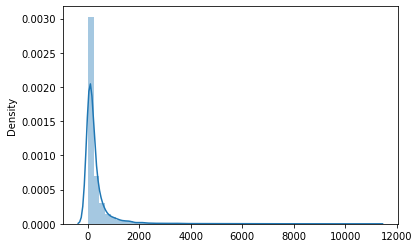

In [219]:
%matplotlib inline
import seaborn as sns
sns.distplot(H0)


In [220]:
clu_chosen=clusters[9]
clu_chosen

(array([13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 17], dtype=int64),
 array([2874, 2704, 3859, 3861, 4276, 4277, 3860, 3147, 4956, 2874, 4278,
        2875, 4954, 4955, 4957, 3863, 3353, 3354, 3355, 2705, 4958, 3888,
        4959, 3149, 3887, 4961, 4988, 4987, 3251, 2771, 2569, 3251, 3253,
        4907, 4908, 4961, 2771, 3252, 4988, 2773, 5071, 4960, 3149, 4089,
        4987, 3887, 4959, 3888, 3158, 3886, 3148, 4958, 3863, 4957, 4955,
        2875, 4956, 3147, 4277, 4278, 4279, 3861, 3860, 4276, 2874, 3355,
        2861, 3354, 3341, 2569, 3251, 3253, 4908, 4961, 5071, 2861, 3341,
        3342, 3355, 4279, 3354, 2863, 2874, 4278, 4918, 4919, 2863],
  

In [221]:
F_val=np.sum(F_obs[clu_chosen])
F_val

919.2252380953363

In [223]:
np.quantile(H0,0.95)

1190.1000000000004

## clu contrasts

In [13]:
lab_left=['aware','aware_sys','aware_dia','aware_exh','aware_inh']
lab_right=['unaware','unaware_sys','unaware_dia','unaware_exh','unaware_inh']
#times=[[0.075,0.095],[0.095,0.12],[0.27,0.31],[0.31,0.35],[0.4,0.5]]
times=[[0.26,0.31]]

In [16]:
lab

NameError: name 'lab' is not defined

In [12]:
for time_cr in times:
    crop_value=time_cr
    for lab_l,lab_r in zip(lab_left,lab_right):
        lab=[f'maskON_correct_cfa_vep_norm_{lab_l}',f'maskON_correct_cfa_vep_norm_{lab_r}']
        stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]
        X1=hp.get_DF_clus(stc_list[0],crop_value=crop_value)
        X2=hp.get_DF_clus(stc_list[1],crop_value=crop_value)
        X=X1-X2
        n_perm=5000
        lab_title=f'{lab_l}_vs_{lab_r}_{int(time_cr[0]*1000)}_to_{int(time_cr[1]*1000)}ms'


        stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label=lab_title, FDR=False, p_val=.05
                                         , report=None, crop_value=crop_value, n_perm=n_perm, thresh=None,time_smooth=False,t_pow=1)

    

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\c

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03515625 0.0390625  0.05078125]
Writing STC to disk...
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03515625 0.03515625 0.046875  ]
Writing STC to disk...
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.0546875 ]
Writing STC to disk...
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03515625 0.0390625  0.0546875 ]
Writing STC to disk...
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.03125    0.03515625 0.0546875 ]
Writing STC to disk...
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware-rh.stc']
['ana/MNE/source/5124_sour

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.046875   0.05078125 0.06640625]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g08_n_tsk_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.06640625]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_exh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\exh\\g08_n_tsk_maskON_correct_cfa_

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.0390625  0.04296875 0.06640625]
Writing STC to disk...
Overwriting existing file.
Overwriting existing file.
[done]
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_cor

  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
writing log to file


In [15]:
p1_crop=[0.09,0.12]
SO_crop=[-0.01,0.02]
VAN_crop=[0.24,0.34]
crop_value=p1_crop
crop_value
lab=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_aware_sys']
effect_labels=['cardiac','aware','cardXawa']
stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]
X1=hp.get_DF_clus(stc_list[0],crop_value=crop_value)
X2=hp.get_DF_clus(stc_list[1],crop_value=crop_value)
X=X1-X2

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g45_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g45_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

In [26]:
os.getcwd()

'Z:\\BBC\\WP1\\data\\EEG\\tsk'

## 

In [16]:
n_perm=5000


stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label='Test', FDR=False, p_val=.05
                                         , report=None, crop_value=crop_value, n_perm=n_perm, thresh=None,time_smooth=False,t_pow=1)


-- number of adjacent vertices : 5124
Test
30
clus threshold for display is 0.1
(30, 9, 5124)
(1, 30, 9, 5124)
(1, 30, 46116)
stat_fun(H1): min=-3.592049 max=4.853276
Running initial clustering
Found 32 clusters
Permuting 4999 times...



Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.015625   0.0234375  0.03515625]
Writing STC to disk...
[done]


### stc_all_cluster.plot()

In [17]:
T_obs, clusters, cluster_p_values, H0=clu

In [18]:
cluster_p_values

array([0.7596, 1.    , 0.999 , 0.9972, 0.0228, 0.994 , 1.    , 1.    ,
       0.9982, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       0.971 , 0.2834, 0.9942, 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ])

In [22]:
clusters

[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 4, 4, 4, 4, 4

In [19]:
vtx=np.unique(clusters[4][1])

In [20]:
lab_sig_clu_0=mne.Label(vertices=vtx-2562,hemi='rh',name='clu_P1_dia_card-rh')

In [21]:
clusters[2]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2], dtype=int64),
 array([  93, 1624, 2019,  262, 1626, 2020,  455, 2021,  998,  996,  997,
         456, 2022,  999,  995,   94, 2029, 2030, 2028, 2025,  458, 1006,
        2027,  457, 1004, 1005, 1007, 1003,   95,   93, 1624, 2019,  262,
        1626, 2020,  455, 2018, 2021,  998,  996,  997,  456, 2022,  999,
         995,   94, 2029, 2030, 2028, 2025,  458, 1006, 2027, 1004, 1005,
        1003,   93, 1624, 2019,  262, 1626, 2020,  455, 2018, 2021,  998,
         996,  997,  999,  995,   94], dtype=int64))

In [64]:
np.array(clusters).flatten()

C:\Users\Engi\AppData\Local\Temp/ipykernel_17600/543692616.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(clusters).flatten()


array([array([0, 0, 0, ..., 5, 5, 5], dtype=int64),
       array([   7,  689,  691, ...,  562,  822, 1767], dtype=int64),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
       array([ 113, 2156, 2159, 2158,  505, 2160, 1106, 1107, 1108, 2161, 1105,
              1109,  506, 1601, 2168], dtype=int64)                            ,
       array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64),
       array([ 142, 1295, 1297, 1299,  583, 1296,  585, 2393, 1295, 1297],
             dtype=int64)                                                 ,
       array([0, 0, 1], dtype=int64),
       array([ 233, 1569, 1569], dtype=int64),
       array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
              4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
              5, 5, 5, 5, 5,

In [213]:
np.shape(np.where(cluster_p_values<0.05))

(1, 0)

In [189]:
np.shape(clusters)

(5124, 1, 1)

In [163]:
el=abs(H0.copy())
el.sort()
el

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.04146296e+00,
       3.04319606e+00, 3.04438604e+00, 3.04906736e+00, 3.05239721e+00,
       3.05505061e+00, 3.08347335e+00, 3.08699885e+00, 3.09137702e+00,
       3.09567721e+00, 3.11213724e+00, 3.11284151e+00, 3.11607401e+00,
      

<AxesSubplot:>

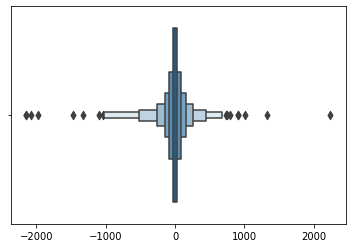

In [175]:
import seaborn as sns
sns.boxenplot(H0)

In [167]:
np.percentile(H0,97.5)

916.3982865390383

In [182]:
cluster_p_values

array([0.161, 0.161])

In [133]:
clusters[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5], dtype=int64),
 array([2637, 3874, 3876, 4285, 4512, 4515, 2985, 3875, 4511, 2879, 4516,
        2987, 3359, 4517, 3512, 4518, 2988, 3513, 4942, 2637, 3874, 4285,
        4515, 2985, 2879, 4516, 3359, 4517, 3512, 4518, 2988, 4942, 2879,
        3359, 4517, 4518, 2597, 3359, 4518, 4943, 2704, 3855, 3857, 4276,
        3856, 4275, 3145, 2704, 3855, 3857, 3859, 4276, 4277, 2873, 3856,
        4275, 3145, 3858, 2874, 4278, 4274, 3353, 2597, 3359, 4518, 4943,
        4517, 2988, 4942, 3143, 4951, 4950, 3146, 3858, 3145, 3859, 3857,
        3856, 2704, 3861, 3855, 2873, 4276, 4277, 4275, 4274, 287

In [132]:
p1_crop=[0.09,0.12]
lab=['maskON_correct_cfa_vep_norm_aware_dia','maskON_correct_cfa_vep_norm_aware_sys']
effect_labels=['cardiac','aware','cardXawa']
stc_list=[hp.get_list_cond(stc_files,label) for label in lab ]
X1=hp.get_DF_clus(stc_list[0],crop_value=p1_crop)
X2=hp.get_DF_clus(stc_list[1],crop_value=p1_crop)
X=X1-X2

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g47_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g49_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\dia\\g51_n_tsk_maskON_correct_cfa_vep_norm_aware_dia-rh.stc']
['ana/MNE/source/5124_sou

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g42_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g44_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g45_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\sys\\g45_n_tsk_maskON_correct_cfa_vep_norm_aware_sys-rh.stc']
['ana/MNE/source/5124_sou

In [133]:
n_perm=5000


SO_crop=[-0.01,0.02]
stc_all_cluster,clu=hp.get_tTest_cluster(X, stc_list[0], src=fwd['src'], label=None, FDR=False, p_val=.05, report=None, crop_value=p1_crop, n_perm=n_perm, thresh=None,time_smooth=False)


-- number of adjacent vertices : 5124
None
30
clus threshold for display is 0.1
(30, 9, 5124)
stat_fun(H1): min=-3.592049 max=4.853276
Running initial clustering
Found 32 clusters
Permuting 4999 times...



Computing cluster p-values
Done.
visualizing clusters
this is the Tstep: 0.00390625
Using control points [0.015625   0.0234375  0.03515625]
i'm stupid
Reading labels from parcellation...
   read 35 labels from C:\Users\Vivi\mne_data\MNE-fsaverage-data\fsaverage\label\lh.aparc.annot
Reading labels from parcellation...
   read 34 labels from C:\Users\Vivi\mne_data\MNE-fsaverage-data\fsaverage\label\rh.aparc.annot
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Reading labels from parcellation...
   read 16 labels from C:\Users\Vivi\mne_data\MNE-fsaverage-data\fsaverage\label\lh.PALS_B12_Visuotopic.annot
Reading labels from parcellation...
   read 27 labels from C:\Users\Vivi\mne_data\MNE-fsaverage-data\fsaverage\label\rh.PALS_B12_Visuotopic.annot
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode

In [91]:
T_obs, clusters, cluster_p_values, H0=clu
cluster_p_values

array([0.146 , 0.0396])

In [93]:
clusters[1]

(array([2595, 2861, 2863, 2874, 2875, 2976, 3341, 3342, 3343, 3354, 3355,
        3824, 3830, 4255, 4256, 4257, 4278, 4279, 4918, 4919, 4920],
       dtype=int64),)

# T-tests template

In [18]:
p1_crop=[-0.1,0.6]
lab=['maskON_correct_cfa_vep_norm_aware_inh','maskON_correct_cfa_vep_norm_unaware_inh']
hp.tTest_ana(stc_files,lab,crop_value=p1_crop,FDR=False,p_val=0.01,time_smooth=False)


['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_sou

<SourceEstimate | 5124 vertices, tmin : -100.0 (ms), tmax : 603.125 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~7.1 MB>

In [8]:
hp.tTest_ana(stc_files,lab,crop_value=(-0.1,0.6),FDR=False,p_val=0.01)

['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g01_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g03_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-lh.stc', 'ana/MNE/source/5124_source/loose/cov_end/depth_3/stc/dSPM\\maskON\\correct\\cfa\\vep\\norm\\aware\\inh\\g08_n_tsk_maskON_correct_cfa_vep_norm_aware_inh-rh.stc']
['ana/MNE/source/5124_sou

<SourceEstimate | 5124 vertices, tmin : -100.0 (ms), tmax : 603.125 (ms), tstep : 3.90625 (ms), data shape : (5124, 181), ~7.1 MB>

# Anovas